In [11]:
# 32 marketing initiatives
# 1 responded, 0 - not responded
# https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm
import pandas as pd

customer_offers = pd.read_csv('data_science/customer_offers.csv')
customer_offers.tail()

,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
95,Williams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,Wilson,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
97,Wood,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98,Wright,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99,Young,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [12]:
customer_offers = customer_offers.set_index('customer_name')

2. Perform kmeans clustering with three clusters and save the cluster that each data point is assigned to.
3. Use PCA to visualize the clusters.
4. Investigate how each cluster differs from the average in each of our features. In other words, find the difference between the proportion of customers in each cluster that responded to an offer and the proportion of customers overall that responded to an offer, for each of the offers. Plot these differences on a bar chart.
5. Load the information about what the offers were from offer_info.csv. For each cluster, find the five offers where the data points in that cluster differ most from the mean, and print out the varietal of those offers.

In [13]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=3, random_state=10)
cluster = model.fit_predict(customer_offers)
offer_cols = customer_offers.columns # ?
customer_offers['cluster'] = cluster

In [17]:
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [18]:
customer_offers['cluster'].unique()

array([0, 1, 2])

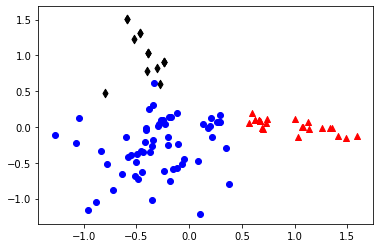

In [22]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2)
customer_offers['pc1'], customer_offers['pc2'] = zip(*pca.fit_transform(customer_offers[offer_cols]))

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in customer_offers['cluster'].unique():
    d = customer_offers[customer_offers['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

plt.show()

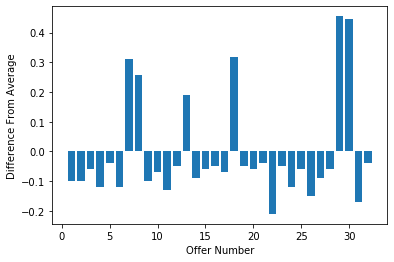

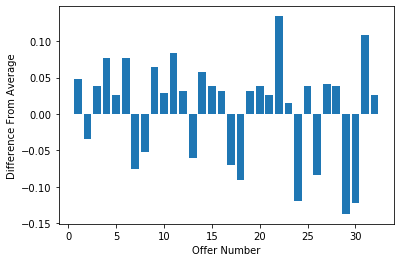

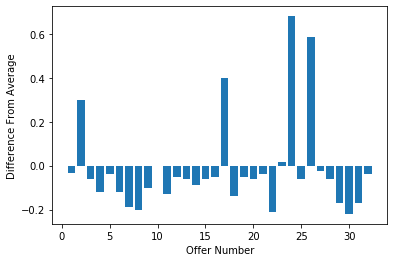

In [25]:
total_proportions = customer_offers[offer_cols].mean()

for i in range(3):
    plt.figure(i)
    cluster_df = customer_offers[customer_offers['cluster'] == i]
    cluster_proportions = cluster_df[offer_cols].mean()

    diff = cluster_proportions - total_proportions
    plt.bar(range(1, 33), diff)
    plt.xlabel('Offer Number')
    plt.ylabel('Difference From Average')
plt.show()

In [47]:
cluster_df = customer_offers[customer_offers['cluster'] == 0]
len(cluster_df)

24

In [52]:
offer_info = pd.read_csv('data_science/offer_info.csv')
offer_info.tail()

,offer_id,varietal
27,28,Cabernet Sauvignon
28,29,Pinot Grigio
29,30,Malbec
30,31,Champagne
31,32,Cabernet Sauvignon


In [57]:
offer_info = pd.read_csv('data_science/offer_info.csv')
for i in range(3):
    cluster_df = customer_offers[customer_offers['cluster'] == i]
    cluster_proportions = cluster_df[offer_cols].mean()

    diff = cluster_proportions - total_proportions
    cluster_rep_offers = list(diff.sort_values(ascending=False).index.astype(int)[0:5])
    print(offer_info.loc[offer_info['offer_id'].isin(cluster_rep_offers),'varietal'])

6         Prosecco
7        Espumante
17       Espumante
28    Pinot Grigio
29          Malbec
Name: varietal, dtype: object
3     Champagne
5      Prosecco
10    Champagne
21    Champagne
30    Champagne
Name: varietal, dtype: object
1     Pinot Noir
16    Pinot Noir
22    Chardonnay
23    Pinot Noir
25    Pinot Noir
Name: varietal, dtype: object


In [60]:
cluster_rep_offers = list(diff.sort_values(ascending=False).index.astype(int)[0:5])
cluster_rep_offers  

[24, 26, 17, 2, 23]